In [1]:
# Data Analysis
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("/content/drive/MyDrive/mbti_1.csv")

In [3]:
X = df['posts']
y = df['type']

In [4]:
print(X)
print(X.shape)

0       'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1       'I'm finding the lack of me in these posts ver...
2       'Good one  _____   https://www.youtube.com/wat...
3       'Dear INTP,   I enjoyed our conversation the o...
4       'You're fired.|||That's another silly misconce...
                              ...                        
8670    'https://www.youtube.com/watch?v=t8edHB_h908||...
8671    'So...if this thread already exists someplace ...
8672    'So many questions when i do these things.  I ...
8673    'I am very conflicted right now when it comes ...
8674    'It has been too long since I have been on per...
Name: posts, Length: 8675, dtype: object
(8675,)


In [5]:
X = X.values.reshape(-1, 1)
print(X)
print(X.shape)

[["'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206|||Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04/round-home-design.jpg .

In [6]:
y = y.values.reshape(-1, 1)
print(y)
print(y.shape)

[['INFJ']
 ['ENTP']
 ['INTP']
 ...
 ['INTP']
 ['INFP']
 ['INFP']]
(8675, 1)


In [13]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X, y = ros.fit_resample(X, y)

In [15]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_new, y_new = ros.fit_resample(X, y)

In [9]:
#from imblearn.under_sampling import RandomUnderSampler

#rus = RandomUnderSampler(random_state=42)
#X_new, y_new = rus.fit_resample(X, y)


In [16]:
df_new = np.concatenate((X_new, y_new.reshape(-1, 1)), axis=1)

In [17]:
df = pd.DataFrame(df_new, columns=['posts', 'type'])


In [18]:
print(df)
print(df.shape)

                                                   posts  type
0      'http://www.youtube.com/watch?v=qsXHcwe3krw|||...  INFJ
1      'I'm finding the lack of me in these posts ver...  ENTP
2      'Good one  _____   https://www.youtube.com/wat...  INTP
3      'Dear INTP,   I enjoyed our conversation the o...  INTJ
4      'You're fired.|||That's another silly misconce...  ENTJ
...                                                  ...   ...
29307  'Both too sensitive and too insensitive.|||htt...  ISTP
29308  'Music can communicate my state of mind, thoug...  ISTP
29309  'I couldn't agree more with Cormo.  Inflation ...  ISTP
29310  'Multiple girlfriends at once may potentially ...  ISTP
29311  'People perpetually think I'm rolling ball sac...  ISTP

[29312 rows x 2 columns]
(29312, 2)


In [19]:
df.describe(include=['object'])

,posts,type
count,29312,29312
unique,8675,16
top,'yeah apparently I joined in Nov of 08 haha. I...,INFJ
freq,64,1832


In [20]:
MBTI_DS = df

In [21]:
types = np.unique(np.array(MBTI_DS['type']))
print("The Unique values 'type' of personality column",types)

The Unique values 'type' of personality column ['ENFJ' 'ENFP' 'ENTJ' 'ENTP' 'ESFJ' 'ESFP' 'ESTJ' 'ESTP' 'INFJ' 'INFP'
 'INTJ' 'INTP' 'ISFJ' 'ISFP' 'ISTJ' 'ISTP']


In [22]:
total = MBTI_DS.groupby(['type']).count()*50
print("The Total Posts for every Personality Type")
total

The Total Posts for every Personality Type


,posts
type,
ENFJ,91600
ENFP,91600
ENTJ,91600
ENTP,91600
ESFJ,91600
ESFP,91600
ESTJ,91600
ESTP,91600
INFJ,91600


In [23]:
print(MBTI_DS.shape)

(29312, 2)


In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Total post each personality type')

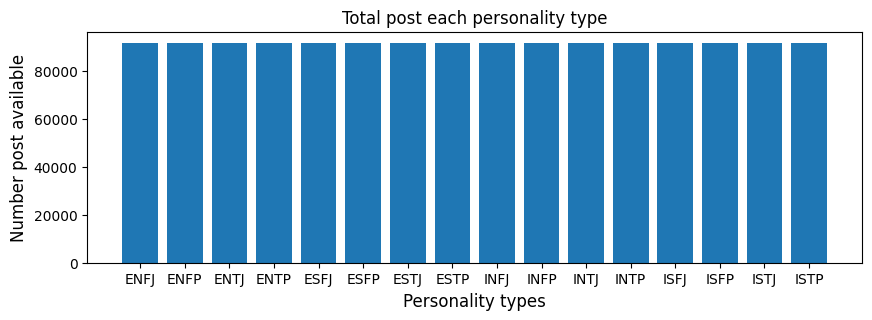

In [26]:
plt.figure(figsize = (10,3))
plt.bar(np.array(total.index), height = total['posts'],)
plt.xlabel('Personality types', size = 12)
plt.ylabel('Number post available', size = 12)
plt.title('Total post each personality type')

In [27]:
print(df)

                                                   posts  type
0      'http://www.youtube.com/watch?v=qsXHcwe3krw|||...  INFJ
1      'I'm finding the lack of me in these posts ver...  ENTP
2      'Good one  _____   https://www.youtube.com/wat...  INTP
3      'Dear INTP,   I enjoyed our conversation the o...  INTJ
4      'You're fired.|||That's another silly misconce...  ENTJ
...                                                  ...   ...
29307  'Both too sensitive and too insensitive.|||htt...  ISTP
29308  'Music can communicate my state of mind, thoug...  ISTP
29309  'I couldn't agree more with Cormo.  Inflation ...  ISTP
29310  'Multiple girlfriends at once may potentially ...  ISTP
29311  'People perpetually think I'm rolling ball sac...  ISTP

[29312 rows x 2 columns]


In [29]:
MBTI_DS_C = MBTI_DS.copy()
#Count Number words for each post of a user
def var_row(row):
    l = []
    for i in row.split('|||'):
        l.append(len(i.split()))
    return np.var(l)

#Count Number words per post for total 50 posts in whole row
MBTI_DS_C['word_each_comment'] = MBTI_DS_C['posts'].apply(lambda x: len(x.split())/50)
MBTI_DS_C['variance_word_count'] = MBTI_DS_C['posts'].apply(lambda x: var_row(x))

plt.figure(figsize=(15,10))
sns.swarmplot("type", "word_each_comment", data=MBTI_DS_C)

TypeError: ignored

<Figure size 1500x1000 with 0 Axes>

<ipython-input-30-71489548d047>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(MBTI_DS["length_posts"]).set_title("Distribution of Lengths of all 50 Posts")


Text(0.5, 1.0, 'Distribution of Lengths of all 50 Posts')

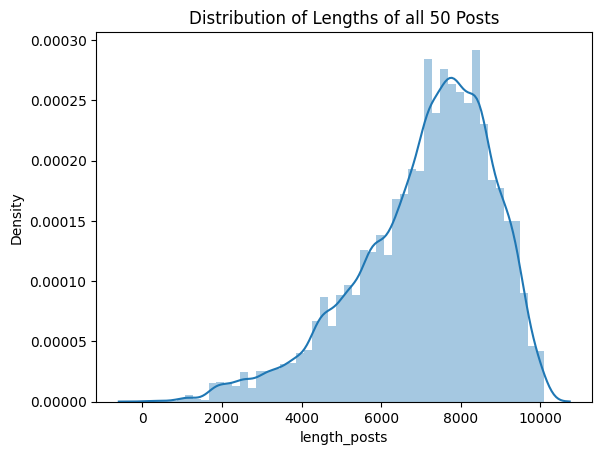

In [30]:
MBTI_DS["length_posts"] = MBTI_DS["posts"].apply(len)
sns.distplot(MBTI_DS["length_posts"]).set_title("Distribution of Lengths of all 50 Posts")

In [32]:
import re
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

#Finding the most common words in all posts.
words = list(MBTI_DS["posts"].apply(lambda x: x.split()))
words = [x for y in words for x in y]
Counter(words).most_common(50)

[('I', 1289051),
 ('to', 963259),
 ('the', 882926),
 ('a', 757456),
 ('and', 739087),
 ('of', 576196),
 ('you', 440125),
 ('is', 430901),
 ('that', 419535),
 ('in', 378167),
 ('my', 344880),
 ('it', 305601),
 ('for', 286367),
 ('have', 265882),
 ('with', 264503),
 ('but', 250583),
 ('be', 231125),
 ('are', 222334),
 ('an', 208632),
 ('like', 208187),
 ('not', 199159),
 ('on', 196464),
 ("I'm", 194682),
 ('me', 187426),
 ('was', 182718),
 ('as', 177779),
 ('this', 176504),
 ('just', 161341),
 ('think', 158599),
 ('about', 154468),
 ('or', 153954),
 ("don't", 149643),
 ('do', 141317),
 ('so', 141041),
 ('your', 138422),
 ('what', 130553),
 ('if', 127340),
 ('can', 125224),
 ('at', 122302),
 ('people', 117314),
 ('when', 112650),
 ('would', 109944),
 ('know', 106223),
 ('really', 104569),
 ('more', 104549),
 ('all', 104065),
 ('get', 102758),
 ('they', 98655),
 ('am', 92594),
 ('because', 92090)]

In [38]:
import wordcloud
from wordcloud import WordCloud

# Machine Learning packages
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# Model training and evaluation
from sklearn.model_selection import train_test_split

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

#Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Ignore noise warning
import warnings
warnings.filterwarnings("ignore")

In [39]:
wc = wordcloud.WordCloud(width=1200, height=500, collocations=False, background_color="white", colormap="tab20b").generate(" ".join(words))

# collocations to False  is set to ensure that the word cloud doesn't appear as if it contains any duplicate words
plt.figure(figsize=(25,10))
# generate word cloud, interpolation 
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")

KeyboardInterrupt: ignored

KeyboardInterrupt: ignored

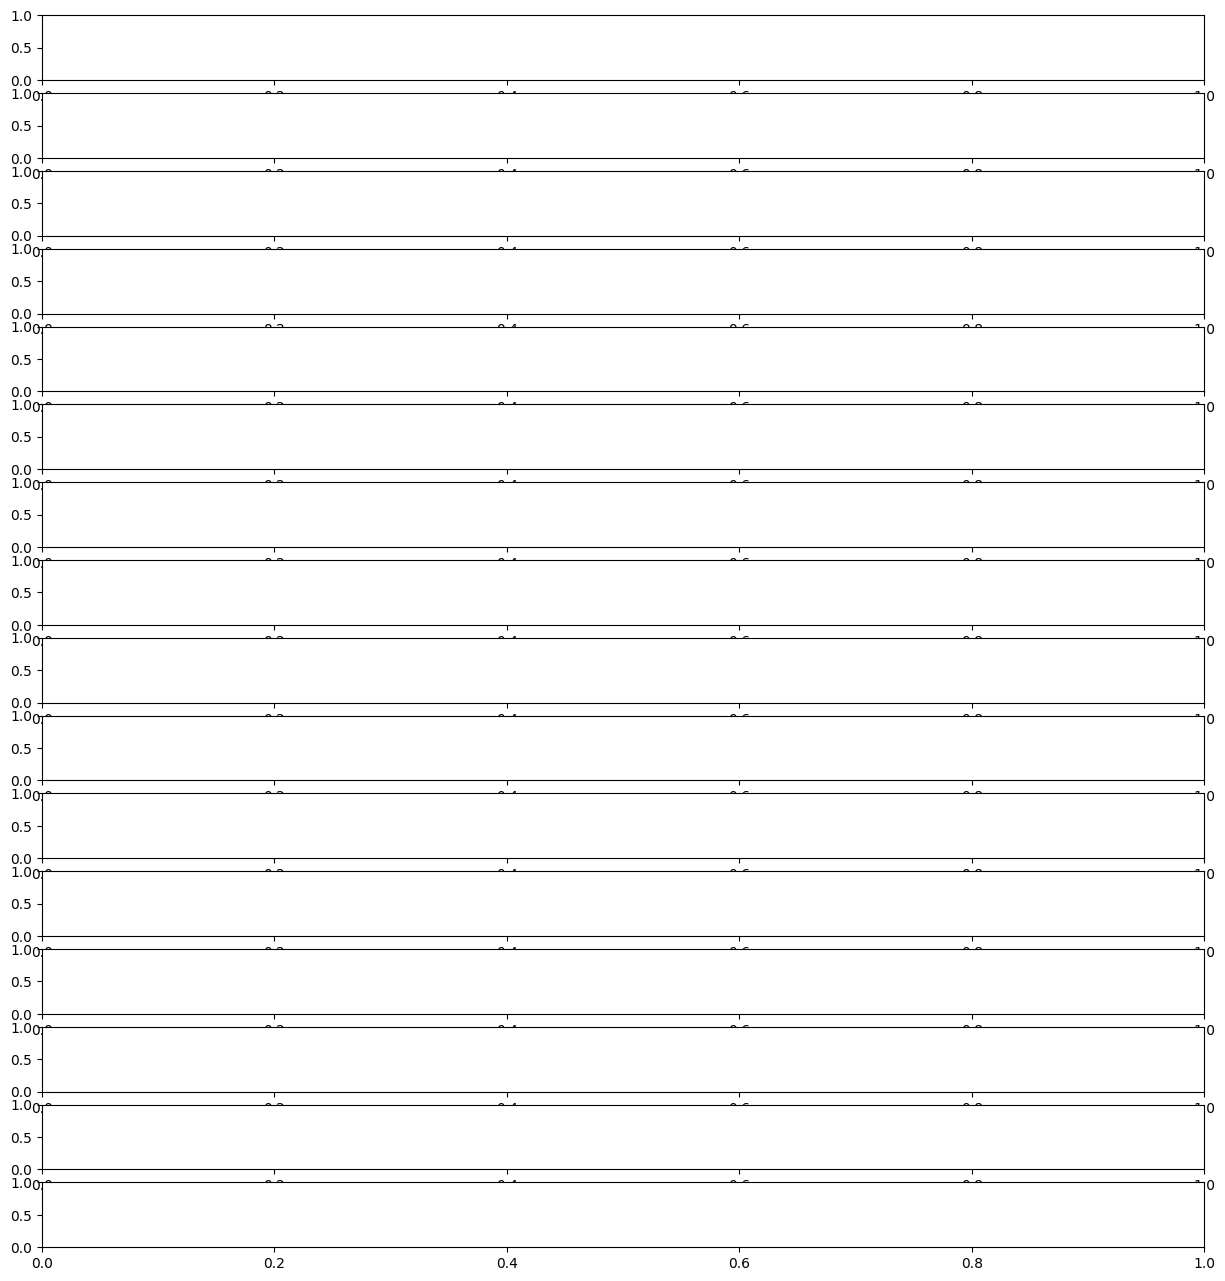

In [40]:
fig, ax = plt.subplots(len(MBTI_DS['type'].unique()), figsize=(15,len(MBTI_DS['type'].unique())))
k = 0
for i in MBTI_DS['type'].unique():
    df_4 = MBTI_DS[MBTI_DS['type'] == i]
    wordcloud = WordCloud(max_words=1628,relative_scaling=1,normalize_plurals=False).generate(df_4['posts'].to_string())
    plt.subplot(4,4,k+1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(i)
    ax[k].axis("off")
    k+=1

In [41]:
def get_types(row):
    t=row['type']

    I = 0; N = 0
    T = 0; J = 0
    
    if t[0] == 'I': I = 1
    elif t[0] == 'E': I = 0
    else: print('I-E not found') 
        
    if t[1] == 'N': N = 1
    elif t[1] == 'S': N = 0
    else: print('N-S not found')
        
    if t[2] == 'T': T = 1
    elif t[2] == 'F': T = 0
    else: print('T-F not found')
        
    if t[3] == 'J': J = 1
    elif t[3] == 'P': J = 0
    else: print('J-P not found')
    return pd.Series( {'IE':I, 'NS':N , 'TF': T, 'JP': J }) 

MBTI_DS_N = MBTI_DS.join(MBTI_DS.apply (lambda row: get_types (row),axis=1))
MBTI_DS_N.head(5)


,posts,type,length_posts,IE,NS,TF,JP
0,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,INFJ,4652,1,1,0,1
1,'I'm finding the lack of me in these posts ver...,ENTP,7053,0,1,1,0
2,'Good one _____ https://www.youtube.com/wat...,INTP,5265,1,1,1,0
3,"'Dear INTP, I enjoyed our conversation the o...",INTJ,6271,1,1,1,1
4,'You're fired.|||That's another silly misconce...,ENTJ,6111,0,1,1,1


In [42]:
#Counting Number posts in one class | Total Number posts in other class

print ("Introversion (I) |  Extroversion (E): \t", MBTI_DS_N['IE'].value_counts()[0], " | ", MBTI_DS_N['IE'].value_counts()[1])
print ("Intuition    (N) |  Sensing      (S): \t", MBTI_DS_N['NS'].value_counts()[0], " | ", MBTI_DS_N['NS'].value_counts()[1])
print ("Thinking     (T) |  Feeling      (F): \t", MBTI_DS_N['TF'].value_counts()[0], " | ", MBTI_DS_N['TF'].value_counts()[1])
print ("Judging      (J) |  Perceiving   (P): \t", MBTI_DS_N['JP'].value_counts()[0], " | ", MBTI_DS_N['JP'].value_counts()[1])


Introversion (I) |  Extroversion (E): 	 14656  |  14656
Intuition    (N) |  Sensing      (S): 	 14656  |  14656
Thinking     (T) |  Feeling      (F): 	 14656  |  14656
Judging      (J) |  Perceiving   (P): 	 14656  |  14656


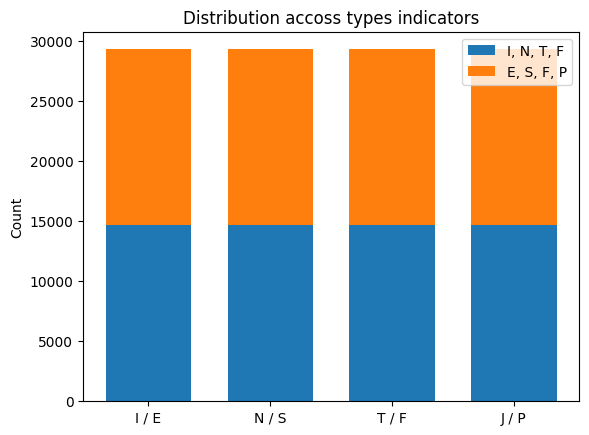

In [43]:
#Plotting the distribution of each personality type indicator
N = 4
bottom = (MBTI_DS_N['IE'].value_counts()[0], MBTI_DS_N['NS'].value_counts()[0], MBTI_DS_N['TF'].value_counts()[0], MBTI_DS_N['JP'].value_counts()[0])
top = (MBTI_DS_N['IE'].value_counts()[1], MBTI_DS_N['NS'].value_counts()[1], MBTI_DS_N['TF'].value_counts()[1], MBTI_DS_N['JP'].value_counts()[1])

ind = np.arange(N)    # the x locations for the groups
# the width of the bars
width = 0.7

p1 = plt.bar(ind, bottom, width, label="I, N, T, F")
p2 = plt.bar(ind, top, width, bottom=bottom, label="E, S, F, P") 

plt.title('Distribution accoss types indicators')
plt.ylabel('Count')
plt.xticks(ind, ('I / E',  'N / S', 'T / F', 'J / P',))
plt.legend()

plt.show()


<Axes: title={'center': 'Features Correlation Heatmap'}>

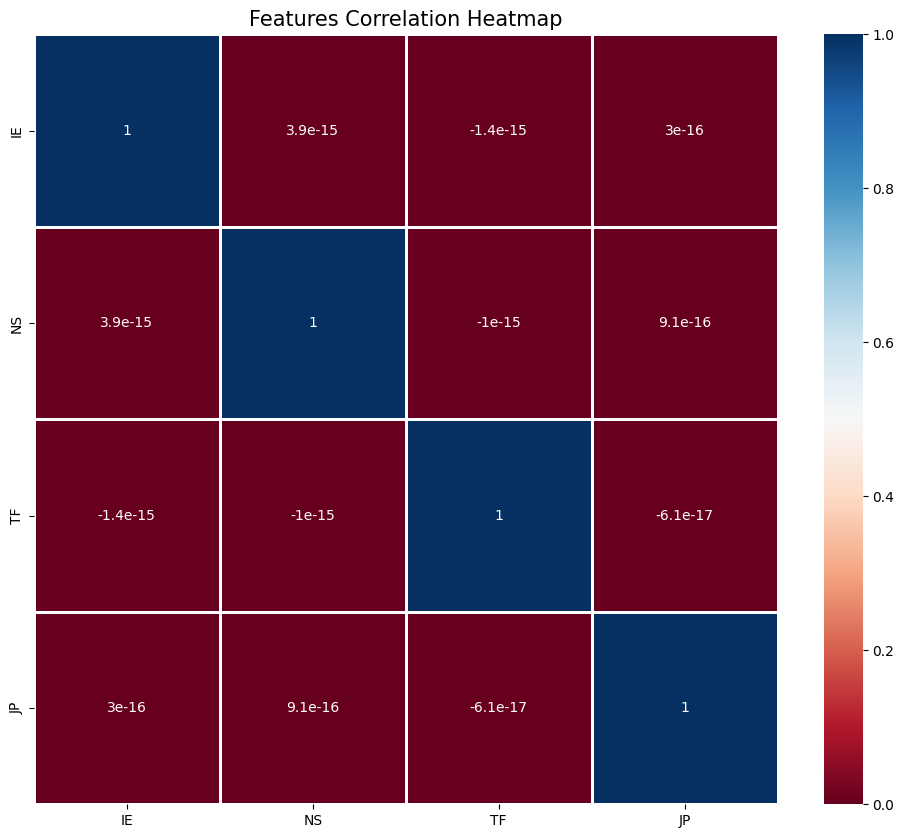

In [44]:
cmap = plt.cm.RdBu
corr = MBTI_DS_N[['IE','NS','TF','JP']].corr()
plt.figure(figsize=(12,10))
plt.title('Features Correlation Heatmap', size=15)
sns.heatmap(corr, cmap=cmap,  annot=True, linewidths=1)

In [46]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [47]:
lemmatiser = WordNetLemmatizer()

# Remove the stop words for speed 
useless_words = stopwords.words("english")

# Remove these from the posts
unique_type_list = ['INFJ', 'ENTP', 'INTP', 'INTJ', 'ENTJ', 'ENFJ', 'INFP', 'ENFP','ISFP', 'ISTP', 'ISFJ', 'ISTJ', 'ESTP', 'ESFP', 'ESTJ', 'ESFJ']
unique_type_list = [x.lower() for x in unique_type_list]

In [48]:
# Splitting the MBTI personality into 4 letters and binarizing it

b_Pers = {'I':0, 'E':1, 'N':0, 'S':1, 'F':0, 'T':1, 'J':0, 'P':1}
b_Pers_list = [{0:'I', 1:'E'}, {0:'N', 1:'S'}, {0:'F', 1:'T'}, {0:'J', 1:'P'}]

def translate_personality(personality):
    # Transform MBTI to binary vector
    return [b_Pers[l] for l in personality]

#Show result output for personality prediction
def translate_back(personality):
    # transform binary vector to MBTI personality
    s = ""
    for i, l in enumerate(personality):
        s += b_Pers_list[i][l]
    return s

list_personality_bin = np.array([translate_personality(p) for p in MBTI_DS_N.type])
print("Binarize MBTI list: \n%s" % list_personality_bin)


Binarize MBTI list: 
[[0 0 0 0]
 [1 0 1 1]
 [0 0 1 1]
 ...
 [0 1 1 1]
 [0 1 1 1]
 [0 1 1 1]]


In [49]:
nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [50]:
def pre_process_text(MBTI_DS_N, remove_stop_words=True, remove_mbti_profiles=True):
  list_personality = []
  list_posts = []
  len_MBTI_DS_N = len(MBTI_DS_N)
  i=0
  
  for row in MBTI_DS_N.iterrows():
      #Remove and clean comments
      posts = row[1].posts

      #Remove url links 
      temp = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ', posts)

      #Remove Non-words - keep only words
      temp = re.sub("[^a-zA-Z]", " ", temp)

      # Remove spaces > 1
      temp = re.sub(' +', ' ', temp).lower()

      #Remove multiple letter repeating words
      temp = re.sub(r'([a-z])\1{2,}[\s|\w]*', '', temp)

      #Remove stop words
      if remove_stop_words:
          temp = " ".join([lemmatiser.lemmatize(w) for w in temp.split(' ') if w not in useless_words])
      else:
          temp = " ".join([lemmatiser.lemmatize(w) for w in temp.split(' ')])
          
      #Remove MBTI personality words from posts
      if remove_mbti_profiles:
          for t in unique_type_list:
              temp = temp.replace(t,"")

      # transform mbti to binary vector
      type_labelized = translate_personality(row[1].type) #or use lab_encoder.transform([row[1].type])[0]
      list_personality.append(type_labelized)
      # the cleaned data temp is passed here
      list_posts.append(temp)

  # returns the result
  list_posts = np.array(list_posts)
  list_personality = np.array(list_personality)
  return list_posts, list_personality

list_posts, list_personality  = pre_process_text(MBTI_DS_N, remove_stop_words=True, remove_mbti_profiles=True)

print("Example :")
print("\nPost before preprocessing:\n\n", MBTI_DS_N.posts[0])
print("\nPost after preprocessing:\n\n", list_posts[0])
print("\nMBTI before preprocessing:\n\n", MBTI_DS_N.type[0])
print("\nMBTI after preprocessing:\n\n", list_personality[0])


Example :

Post before preprocessing:

 'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206|||Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/up

In [51]:
nRow, nCol = list_personality.shape
print(f'Number of posts = {nRow}  and No. of Personalities = {nCol} ')


Number of posts = 29312  and No. of Personalities = 4 


In [62]:
import sklearn

sklearn.__version__

'1.2.2'

In [61]:
# Vectorizing the database posts to a matrix of token counts for the model
cntizer = CountVectorizer(analyzer="word", 
                             max_features=1000,  
                             max_df=0.7,
                             min_df=0.1) 
# the feature should be made of word n-gram 

# Learn the vocabulary dictionary and return term-document matrix
print("Using CountVectorizer :")
X_cnt = cntizer.fit_transform(list_posts)

#The enumerate object yields pairs containing a count and a value (useful for obtaining an indexed list)
feature_names = list(enumerate(cntizer.get_feature_names_out()))
print("10 feature names can be seen below")
print(feature_names[0:10])

# For the Standardization or Feature Scaling Stage :-
# Transform the count matrix to a normalized tf or tf-idf representation
tfizer = TfidfTransformer()

# Learn the idf vector (fit) and transform a count matrix to a tf-idf representation
print("\nUsing Tf-idf :")

print("Now the dataset size is as below")
X_tfidf =  tfizer.fit_transform(X_cnt).toarray()
print(X_tfidf.shape)


Using CountVectorizer :
10 feature names can be seen below
[(0, 'ability'), (1, 'able'), (2, 'absolutely'), (3, 'accurate'), (4, 'across'), (5, 'act'), (6, 'action'), (7, 'actually'), (8, 'add'), (9, 'advice')]

Using Tf-idf :
Now the dataset size is as below
(29312, 567)


In [63]:
personality_type = [ "IE: Introversion (I) | Extroversion (E)", "NS: Intuition    (N) | Sensing      (S)", 
                   "FT: Feeling      (F) | Thinking     (T)", "JP: Judging      (J) | Perceiving   (P)"  ]

for l in range(len(personality_type)):
    print(personality_type[l])


IE: Introversion (I) | Extroversion (E)
NS: Intuition    (N) | Sensing      (S)
FT: Feeling      (F) | Thinking     (T)
JP: Judging      (J) | Perceiving   (P)


In [64]:
print("X: First post in tf-idf representation\n%s" % X_tfidf[0])


X: First post in tf-idf representation
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.08623681 0.07248324
 0.         0.         0.         0.         0.         0.
 0.         0.04668306 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.05415562 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.08993427 0.         0.         0.
 0.         0.05677467 0.07056272 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.16952372 0.         0.
 0.0981928  0.         0.         0.05081159 0.         0.
 0.         0.         0.07583777 0.         0.         0.
 0.         0.         0.07631509 0.07516737 0.0954457  0.
 0.      

In [65]:
print("For MBTI personality type : %s" % translate_back(list_personality[0,:]))
print("Y : Binarized MBTI 1st row: %s" % list_personality[0,:])


For MBTI personality type : INFJ
Y : Binarized MBTI 1st row: [0 0 0 0]


In [66]:
X = X_tfidf
Y = list_personality[:,l]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=7)


In [67]:
# Logistic Regression for MBTI dataset
# Individually training each mbti personlity type
for l in range(len(personality_type)):

    Y = list_personality[:,l]

    # split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=7)

    # fit model on training data
    model = LogisticRegression() 
    model.fit(X_train, y_train)

    # make predictions for test data
    y_pred = model.predict(X_test)
    
    predictions = [round(value) for value in y_pred]
    # evaluate predictions
    accuracy = accuracy_score(y_test, predictions)
    
    print("%s Accuracy: %.2f%%" % (personality_type[l], accuracy * 100.0))
    print("%s Classification report for Train Data" % (personality_type[l]))
    print(classification_report(y_train,model.predict(X_train)))
    print("%s Classification report for Test Data" % (personality_type[l]))
    print(classification_report(y_test, y_pred))
    print("\n")

IE: Introversion (I) | Extroversion (E) Accuracy: 73.37%
IE: Introversion (I) | Extroversion (E) Classification report for Train Data
              precision    recall  f1-score   support

           0       0.76      0.74      0.75      9818
           1       0.75      0.77      0.76      9821

    accuracy                           0.75     19639
   macro avg       0.75      0.75      0.75     19639
weighted avg       0.75      0.75      0.75     19639

IE: Introversion (I) | Extroversion (E) Classification report for Test Data
              precision    recall  f1-score   support

           0       0.74      0.71      0.73      4838
           1       0.72      0.75      0.74      4835

    accuracy                           0.73      9673
   macro avg       0.73      0.73      0.73      9673
weighted avg       0.73      0.73      0.73      9673



NS: Intuition    (N) | Sensing      (S) Accuracy: 73.40%
NS: Intuition    (N) | Sensing      (S) Classification report for Train Data


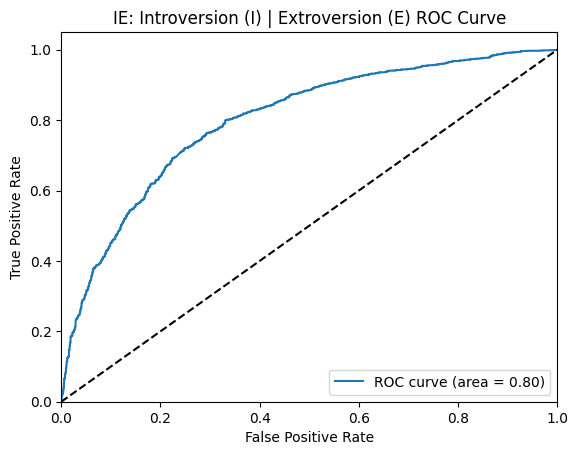

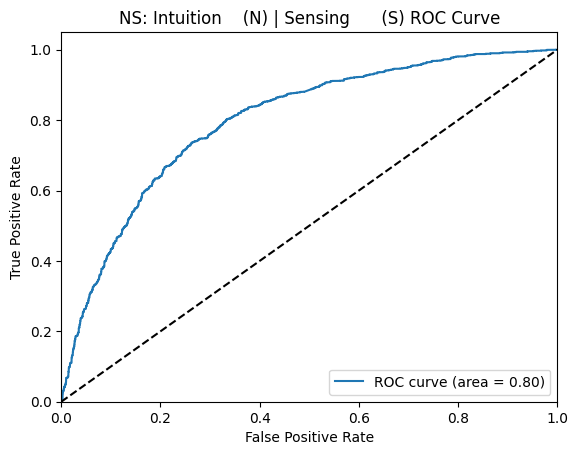

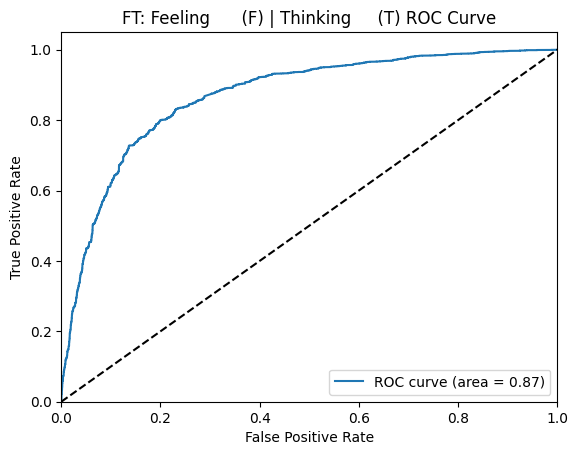

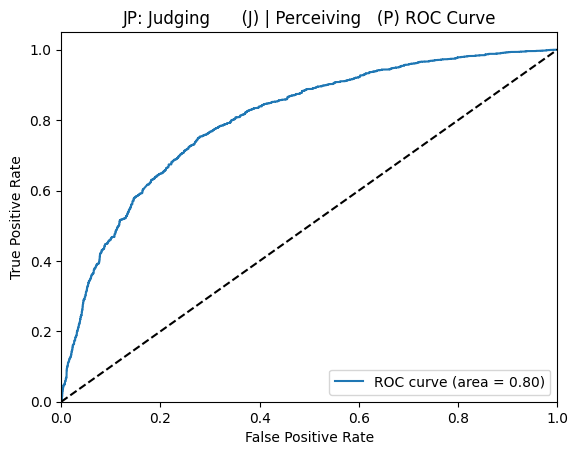

In [71]:
from sklearn.metrics import roc_curve, auc

for l in range(len(personality_type)):

    Y = list_personality[:,l]

    # split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=7)

    # fit model on training data
    model = LogisticRegression() 
    model.fit(X_train, y_train)

    # make predictions for test data
    y_pred = model.predict_proba(X_test)[:,1] # use predict_proba instead of predict for ROC curve
    
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
    plt.title('%s ROC Curve' % (personality_type[l]))
    plt.legend(loc="lower right")
    plt.show()


K-value 1

K-Nearest Neighbors - Train ConfusionMatrix

 Predicted     0     1
Actuall              
0          9847     0
1           128  9664

K-Nearest Neighbors - Train accuracy: 0.993

K-Nearest Neighbors - Train Classification Report
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      9847
           1       1.00      0.99      0.99      9792

    accuracy                           0.99     19639
   macro avg       0.99      0.99      0.99     19639
weighted avg       0.99      0.99      0.99     19639



K-Nearest Neighbors - Test Confusion Matrix

 Predicted     0     1
Actuall              
0          4729    80
1          1107  3757

K-Nearest Neighbors - Test accuracy: 0.877

K-Nearest Neighbors - Test Classification Report
               precision    recall  f1-score   support

           0       0.81      0.98      0.89      4809
           1       0.98      0.77      0.86      4864

    accuracy                       

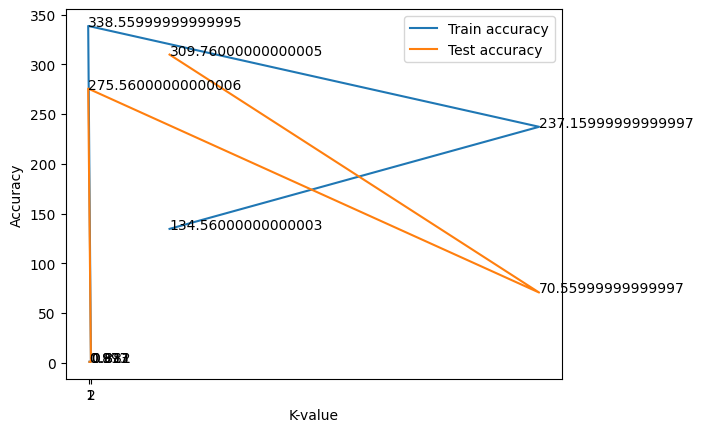

In [72]:
#KNN Classifier
from sklearn.metrics import accuracy_score,classification_report

# Tuning of K- value for Train & Test data
dummyarray = np.empty((5,3))
k_valchart = pd.DataFrame(dummyarray)
k_valchart.columns = ["K_value","Train_acc","Test_acc"]
k_vals = [1,2]
for i in range(len(k_vals)):
    knn_fit = KNeighborsClassifier(n_neighbors=k_vals[i],p=2,metric='minkowski')
    knn_fit.fit(X_train,y_train)
    print ("\nK-value",k_vals[i])
    tr_accscore = round(accuracy_score(y_train,knn_fit.predict(X_train)),3)
    print ("\nK-Nearest Neighbors - Train ConfusionMatrix\n\n",pd.crosstab( y_train, knn_fit.predict(X_train),rownames =["Actuall"],colnames = ["Predicted"]) )
    print ("\nK-Nearest Neighbors - Train accuracy:",tr_accscore)
    print ("\nK-Nearest Neighbors - Train Classification Report\n",classification_report(y_train,knn_fit.predict(X_train)))
    ts_accscore = round(accuracy_score(y_test,knn_fit.predict(X_test)),3)
    print ("\n\nK-Nearest Neighbors - Test Confusion Matrix\n\n",pd.crosstab( y_test,knn_fit.predict(X_test),rownames =["Actuall"],colnames = ["Predicted"]))
    print ("\nK-Nearest Neighbors - Test accuracy:",ts_accscore)
    print ("\nK-Nearest Neighbors - Test Classification Report\n",classification_report(y_test,knn_fit.predict(X_test)))
    k_valchart.loc[i, 'K_value'] = k_vals[i]
    k_valchart.loc[i, 'Train_acc'] = tr_accscore
    k_valchart.loc[i, 'Test_acc'] = ts_accscore

import matplotlib.pyplot as plt

# plot the train and test accuracy scores for different K-values
plt.plot(k_valchart['K_value'], k_valchart['Train_acc'], label='Train accuracy')
plt.plot(k_valchart['K_value'], k_valchart['Test_acc'], label='Test accuracy')
plt.xlabel('K-value')
plt.ylabel('Accuracy')
plt.xticks(k_valchart['K_value'])
plt.xticks([1,2])
for a,b in zip(k_valchart["K_value"],k_valchart["Train_acc"]):
    plt.text(a, b, str(b),fontsize=10)
for a,b in zip(k_valchart["K_value"],k_valchart["Test_acc"]):
    plt.text(a, b, str(b),fontsize=10)
plt.legend()
plt.show()


In [73]:
#XGBoost model for MBTI dataset 
# Individually training each mbti personlity type
for l in range(len(personality_type)):
    
    Y = list_personality[:,l]

    # split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=7)

    # fit model on training data
    model = XGBClassifier()
    model.fit(X_train, y_train)

    # make predictions for test data
    y_pred = model.predict(X_test)
    predictions = [round(value) for value in y_pred]
    # evaluate predictions
    accuracy = accuracy_score(y_test, predictions)
    
    print("%s Accuracy: %.2f%%" % (personality_type[l], accuracy * 100.0))
    print("%s Classification report for Train Data" % (personality_type[l]))
    print(classification_report(y_train,model.predict(X_train)))
    print("%s Classification report for Test Data" % (personality_type[l]))
    print(classification_report(y_test, y_pred))
    print("\n")


IE: Introversion (I) | Extroversion (E) Accuracy: 94.45%
IE: Introversion (I) | Extroversion (E) Classification report for Train Data
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      9818
           1       0.98      0.99      0.99      9821

    accuracy                           0.99     19639
   macro avg       0.99      0.99      0.99     19639
weighted avg       0.99      0.99      0.99     19639

IE: Introversion (I) | Extroversion (E) Classification report for Test Data
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      4838
           1       0.94      0.95      0.95      4835

    accuracy                           0.94      9673
   macro avg       0.94      0.94      0.94      9673
weighted avg       0.94      0.94      0.94      9673



NS: Intuition    (N) | Sensing      (S) Accuracy: 97.26%
NS: Intuition    (N) | Sensing      (S) Classification report for Train Data
